In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['fivethirtyeight', 'figsize'])
_SAVEDIR_ = 'Tex/figures/'
from IPython.display import HTML


def prog_bar(cur_val,max_val,msg = ""):
    import sys
    sys.stdout.write('\r')
    eq = int(np.ceil(np.true_divide(cur_val*100,max_val*5)))
    sys.stdout.write("[{:20s}] {}/{} {:}  ".format('='*eq, cur_val+1,max_val,msg))
    sys.stdout.flush()


[====================] 1050/1050   

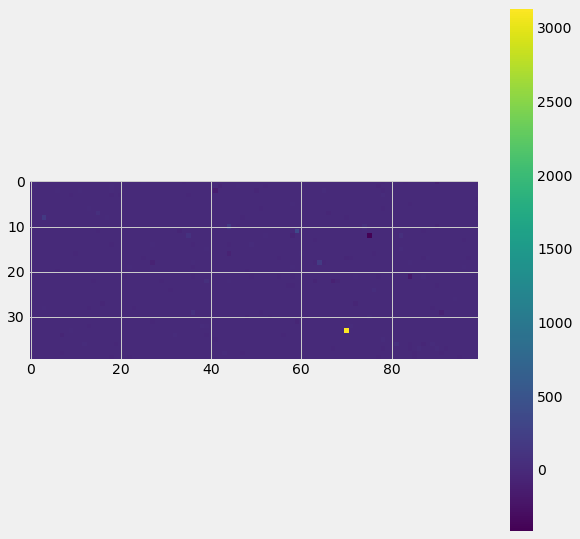

In [20]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
    
    rho = np.sum(f,axis=0)
    for k in range(9):
        u += f[k]*ex[k]
#         print(ey[k])
        v += f[k]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v

lx = 100
ly = 40
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 
ex = [0,1,0,-1,0,1,-1,-1,1]
ey = [0,0,1,0,-1,1,1,-1,-1]
tau = 1.
g=1.0e-4
cs=1./np.sqrt(3)

tstep = 1050
Nsteps = tstep
tplot = 100

rho = np.ones([lx,ly])
u = np.zeros([lx,ly])
v = np.zeros([lx,ly])
f_in = np.zeros([Nsteps, 9,lx,ly])
bound_array = np.zeros([lx,ly])
bound_array[:,0] = 1
bound_array[:,-1] = 1
bound_array[20:25,20:25]=1
opp = [0,3,4,1,2,7,8,5,6]
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 

# initialization
for kk in range(0,9):  
    f_in[0,kk,:,:] = w[kk]*rho

# f_out = f_in   # PBC 

# main loop
for ts in range(1,tstep):
    # macroscopic
    prog_bar(ts,Nsteps)
    rho, u, v = calc_macro(f_in[ts-1],rho,u,v)

    # collision
    u = u + g*tau/rho
    for k in range(0,9):
        cu = (1./cs**2)*(ex[k]*u+ey[k]*v)
        feq = rho*w[k]*(1.+cu+cu**2-(u**2+v**2)/(2*cs**2))
        f_in[ts, k, :,:] = f_in[ts-1,k,:,:] +(1./tau)*(feq-f_in[ts-1,k,:,:])
    
                
    # prepare the next time step
    fout = f_in[ts]
    
    # boundary
    # north & south
    for k in range(0,9):
        fout[k][bound_array == 1] = f_in[ts,opp[k]][bound_array == 1]
#         fout[k,:,ly-1] = f_in[ts,opp[k],:,ly-1]
#         fout[k,:,0] = f_in[ts,opp[k],:,0]
        
#     for ii in range(0,lx): 
#         for kk in range(0,9): 
#             fout[kk,ii,ly-1] = f_in[opp[kk],ii,ly-1]
#             fout[kk,ii,0] = f_in[opp[kk],ii,0]

    # streaming
    for kk in range(0,9): 
        f_in[ts,kk,:,:] = np.roll(fout[kk,:,:],(ex[kk],ey[kk]),(0,1))
#         f_in[kk,:,:] np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))
#         f_in[kk,:,:] = np.roll(fout[kk,:],ex[kk])
#         for jj in range(0,lx):
#                 f_in[kk,jj,:] = np.roll(fout[kk,jj,:],ey[kk])

    # plot the output
rho, u,v = calc_macro(f_in[-200],rho,u,v)
plt.imshow(u.T)
plt.colorbar()
plt.show()

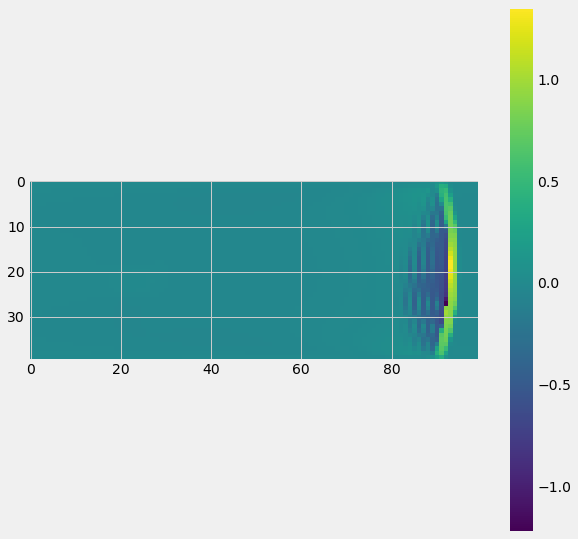

In [42]:
def f(i):
    return calc_macro(f_in[i],rho,u,v)[1].T
plt.imshow(f(695))
plt.colorbar()
plt.show()

50


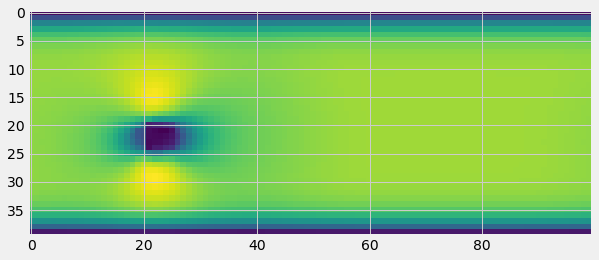

In [27]:
plt.imshow(f(50))

In [67]:
u_list = np.zeros([Nsteps,lx,ly])
for i in range(Nsteps):
    u_list[i] = calc_macro(f_in[i],rho,u,v)[1]

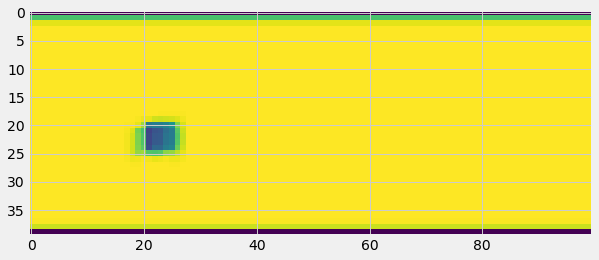

In [68]:
plt.imshow(u_list[3].T)

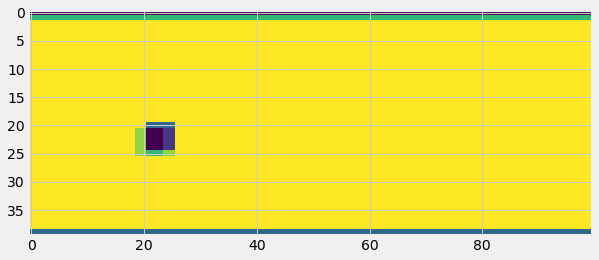

In [34]:
fig,ax = plt.subplots()
def draw(i):
    ax.imshow(calc_macro(f_in[i],rho,u,v)[1].T)
def animate(i):
    ax.clear()
    draw(i)
    return ax,
draw(0)
anim = animation.FuncAnimation(fig, animate, np.arange(1, 1000), interval=50)
plt.show()
HTML(anim.to_html5_video())

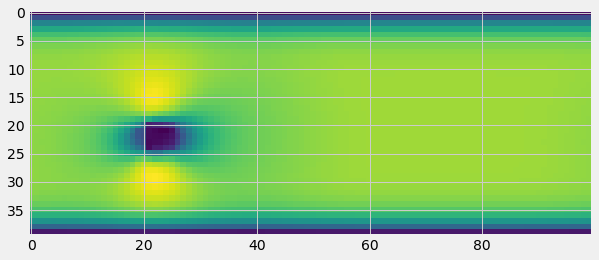

In [32]:
fig,ax = plt.subplots()
ax.imshow(calc_macro(f_in[50],rho,u,v)[1].T)

[====================] 1050/1050   

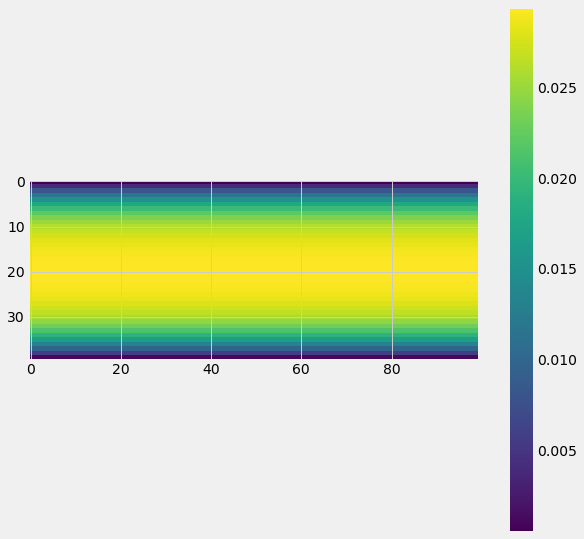

In [50]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
    
    rho = np.sum(f,axis=0)
    for k in range(9):
        u += f[k]*ex[k]
#         print(ey[k])
        v += f[k]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v

lx = 100
ly = 40
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 
ex = [0,1,0,-1,0,1,-1,-1,1]
ey = [0,0,1,0,-1,1,1,-1,-1]
tau = 1.
g=1.0e-4
cs=1./np.sqrt(3)

tstep = 1050
Nsteps = tstep
tplot = 100

rho = np.ones([lx,ly])
u = np.zeros([lx,ly])
v = np.zeros([lx,ly])
bound_array = np.zeros([lx,ly])
bound_array[:,0] = 1
bound_array[:,-1] = 1
bound_array[20:25,20:25]=1
opp = [0,3,4,1,2,7,8,5,6]
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 


def go(f,boundaries,internal_bound):
# initialization
    rho = np.ones([lx,ly])
    u = np.zeros([lx,ly])
    v = np.zeros([lx,ly])
    for kk in range(0,9):  
        f[0,kk,:,:] = w[kk]*rho

    # main loop
    for ts in range(1,tstep):
        # macroscopic
        prog_bar(ts,Nsteps)
        rho, u, v = calc_macro(f[ts-1],rho,u,v)

        # collision
        u = u + g*tau/rho
        for k in range(0,9):
            cu = (1./cs**2)*(ex[k]*u+ey[k]*v)
            feq = rho*w[k]*(1.+cu+cu**2-(u**2+v**2)/(2*cs**2))
            f[ts, k, :,:] = f[ts-1,k,:,:] +(1./tau)*(feq-f[ts-1,k,:,:])


        # prepare the next time step
        fout = f[ts]

        # boundary
        # north & south
        for k in range(0,9):
            fout[k][boundaries == 1] = f[ts,opp[k]][boundaries == 1]
#             fout[k][internal_bound==1]=0
        # streaming
        for kk in range(0,9): 
            f[ts,kk,:,:] = np.roll(fout[kk,:,:],(ex[kk],ey[kk]),(0,1))
f_simple = np.zeros([Nsteps, 9,lx,ly])
bound_array_simple = np.zeros([lx,ly])
bound_array_simple[:,0] = 1
bound_array_simple[:,-1] = 1
go(f_simple,bound_array_simple)
    # plot the output
rho, u,v = calc_macro(f_simple[-100],rho,u,v)
plt.imshow(u.T)
plt.colorbar()
plt.show()

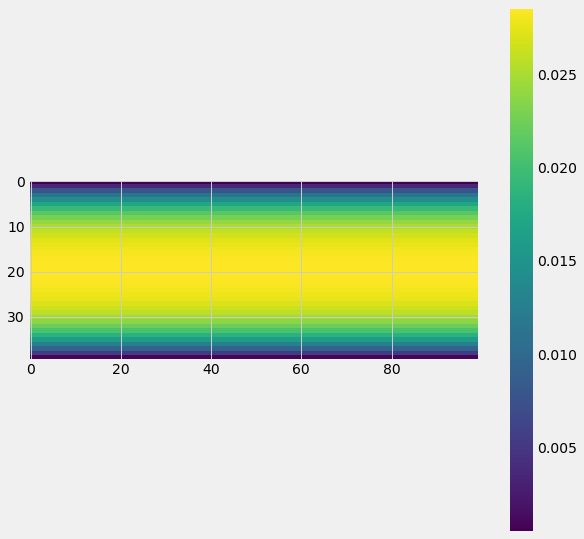

In [54]:
plt.imshow(calc_macro(f_simple[-1],rho,u,v)[1].T)
plt.colorbar()

## Using function  w/ obstacle

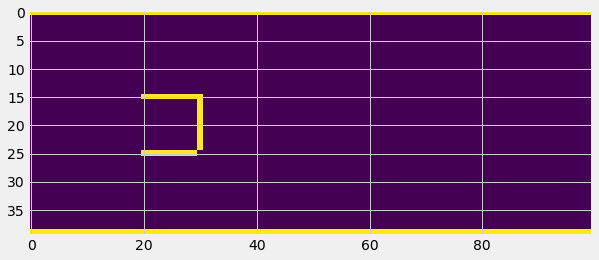

/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


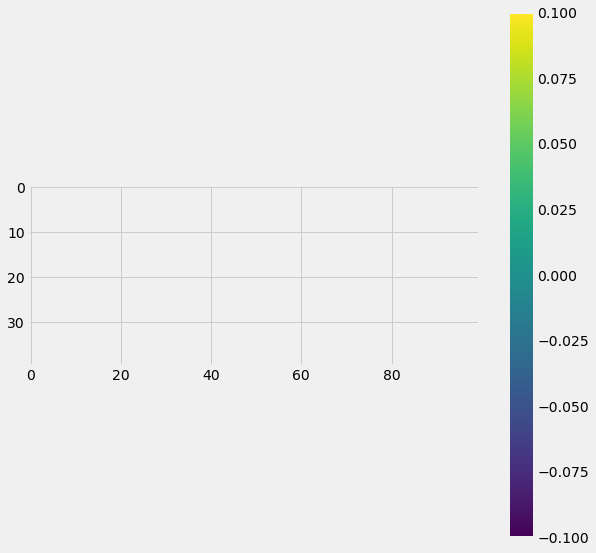

In [137]:
f_square = np.zeros([Nsteps,9,lx,ly])
boundary_square = np.zeros([lx,ly])
boundary_square[:,(0,-1)] =1
boundary_square[20:30,15:25]=1
plt.imshow(boundary_square.T)
# plt.show()
# go(f_square,boundary_square)

def u_plot(f,i):
    plt.figure()
    plt.imshow(calc_macro(f[i],rho,u,v)[1].T)
    plt.colorbar()
    plt.show()
    
    
def go(f,boundaries,internal_bound):
# initialization
    rho = np.ones([lx,ly])
    u = np.zeros([lx,ly])
    v = np.zeros([lx,ly])
    for kk in range(0,9):  
        f[0,kk,:,:] = w[kk]*rho

    # main loop
    for ts in range(1,Nsteps):
        # macroscopic
        prog_bar(ts,Nsteps)
        rho, u, v = calc_macro(f[ts-1],rho,u,v)

        # collision
        u = u + g*tau/rho
        for k in range(0,9):
            cu = (1./cs**2)*(ex[k]*u+ey[k]*v)
            feq = rho*w[k]*(1.+cu+cu**2-(u**2+v**2)/(2*cs**2))
            f[ts, k, :,:] = f[ts-1,k,:,:] +(1./tau)*(feq-f[ts-1,k,:,:])


        # prepare the next time step
        fout = f[ts]

        # boundary
        # north & south
        for k in range(0,9):
            fout[k][boundaries == 1] = f[ts,opp[k]][boundaries == 1]
#             fout[k][internal_bound==1]=0
        # streaming
        for kk in range(0,9): 
            f[ts,kk,:,:] = np.roll(fout[kk,:,:],(ex[kk],ey[kk]),(0,1))
internal_bound =np.zeros([lx,ly])
internal_bound[21:29,16:24]=5
plt.imshow(internal_bound.T)
plt.show()

plt.imshow(calc_macro(f_square[200],rho,u,v)[1].T)
plt.colorbar()
plt.show()

[====================] 800/800   

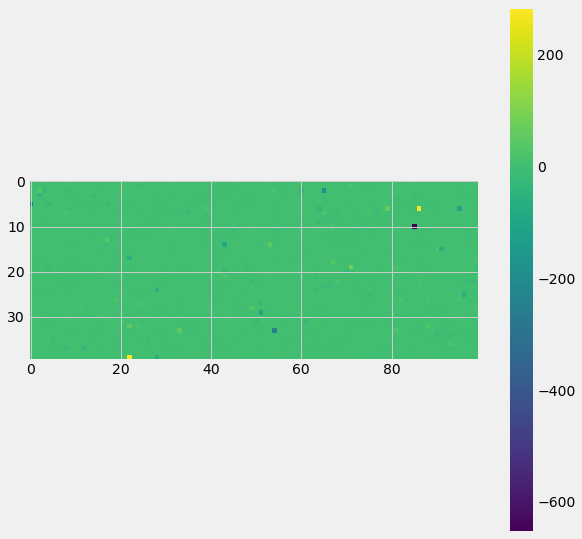

In [173]:
Nsteps = 800
f_square = np.zeros([Nsteps,9,lx,ly])
boundary_square = np.zeros([lx,ly])
boundary_square[:,(0,-1)] =1
boundary_square[20:31,15]=1
boundary_square[20:31,25]=1
boundary_square[20,15:25]=1
boundary_square[30,15:25]=1

internal_bound =np.zeros([lx,ly])
internal_bound[21:29,16:24]=1

def go(f,boundaries,internal_bound):
# initialization
    rho = np.ones([lx,ly])
    u = np.zeros([lx,ly])
    v = np.zeros([lx,ly])
    for kk in range(0,9):  
        f[0,kk,:,:] = w[kk]*rho

    # main loop
    for ts in range(1,Nsteps):
        # macroscopic
        prog_bar(ts,Nsteps)
        rho, u, v = calc_macro(f[ts-1],rho,u,v)

        # collision
        u = u + g*tau/rho
        u[internal_bound==1]=0
        for k in range(0,9):
            cu = (1./cs**2)*(ex[k]*u+ey[k]*v)
            feq = rho*w[k]*(1.+cu+cu**2-(u**2+v**2)/(2*cs**2))
            f[ts, k, :,:] = f[ts-1,k,:,:] +(1./tau)*(feq-f[ts-1,k,:,:])


        # prepare the next time step
        fout = np.copy(f[ts])

        for k in range(0,9):
            fout[k][boundaries == 1] = f[ts,opp[k]][boundaries == 1]
        # streaming
        for kk in range(0,9): 
            f[ts,kk,:,:] = np.roll(fout[kk,:,:],(ex[kk],ey[kk]),(0,1))
#             f[ts,kk][internal_bound==1]=0
go(f_square,boundary_square, internal_bound)
# plt.imshow(boundary_square.T)
# plt.imshow(internal_bound.T)
# plt.xlim([15,35])
# plt.grid('off')
# plt.colorbar()
# plt.show()
plt.imshow(calc_macro(f_square[799],rho,u,v)[1].T)
plt.colorbar()
plt.show()

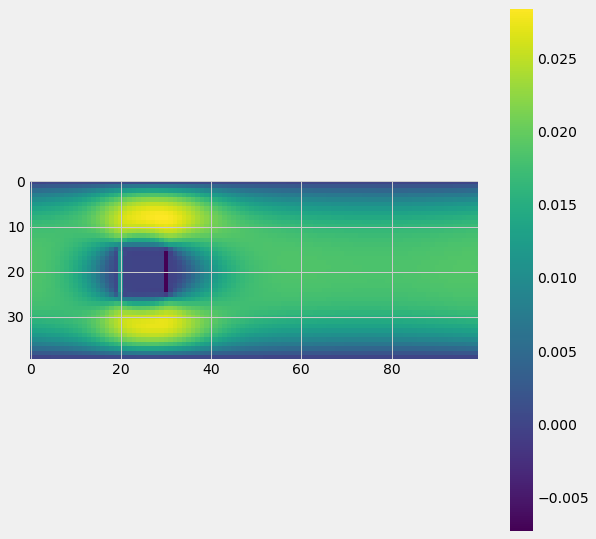

In [175]:
u_plot(f_square,300)

In [158]:
def make_anim(f,frames = None):
    if frames is None:
        frames = range(f.shape[0])
    fig,ax = plt.subplots()
    def draw(i):
        ax.imshow(calc_macro(f[i],rho,u,v)[1].T)
    def animate(i):
        ax.clear()
        ax.grid('off')
        draw(i)
        return ax,
    draw(0)
    anim = animation.FuncAnimation(fig, animate, frames, interval=15)
    plt.close()
    print("convert to html5")
    return anim
# anim.to_html5_video())
anim = make_anim(f_square)
# HTML(anim)

convert to html5


In [159]:
for i in range(0,1000,5):
    plt.imshow(flip_T(calc_macro_f(f[i])[0]))
    plt.grid('off')
    plt.colorbar()
    plt.savefig('figures/obstacle_'+str(i).zfill(5)+'.png')
    plt.close()